## TITANIC SURVIVAL PREDICTION

In [32]:
import pandas as pd

In [33]:
data = pd.read_csv('~/Downloads/archive (2)/Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
# for checking any null values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
data.drop(columns=['PassengerId','Name','Cabin', 'Ticket'],inplace=True)  ## Droping from the Dataset.

In [38]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [39]:
data['Sex'].replace(['male', 'female'],[0,1],inplace = True)

In [40]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [41]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [42]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [43]:
# Fill missing values in embarked column by imputing the mode
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [44]:
data["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [45]:
data['Embarked'].replace(['C', 'S','Q'],[0,1,2],inplace = True)

In [46]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


In [47]:
correlation = data.corr()

In [48]:
correlation

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.125953
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.305762
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,-0.022521
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.031924
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,0.030874
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.035957
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,-0.268865
Embarked,-0.125953,0.305762,-0.022521,-0.031924,0.030874,-0.035957,-0.268865,1.000000


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

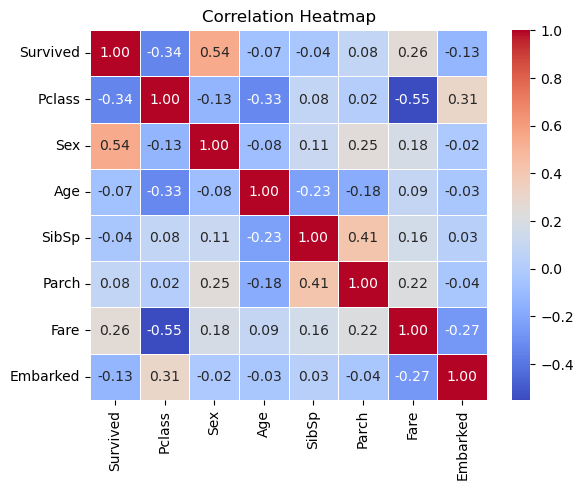

In [50]:
# heatmap for correlation
plt.figure.figsize = [(8,6)]
sns.heatmap(correlation,fmt='.2f', linewidths=.5,annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [103]:
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [88]:
X,y = data.drop(columns = 'Survived',axis = 1), data.Survived
X_train, X_test, y_train, y_test = split(X,y,test_size = 0.20, random_state = 42)

In [89]:
lr = LinearRegression()

In [90]:
lr.fit(X_train,y_train)

LinearRegression()

In [102]:
y_pred = lr.predict(X_test)

In [93]:
y_train,y_test,X_train,X_test

(331    0
 733    0
 382    0
 704    0
 813    0
       ..
 106    1
 270    0
 860    0
 435    1
 102    0
 Name: Survived, Length: 712, dtype: int64,
 709    1
 439    0
 840    0
 720    1
 39     1
       ..
 433    0
 773    0
 25     1
 84     1
 10     1
 Name: Survived, Length: 179, dtype: int64,
      Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
 331       1    0  45.500000      0      0   28.5000         1
 733       2    0  23.000000      0      0   13.0000         1
 382       3    0  32.000000      0      0    7.9250         1
 704       3    0  26.000000      1      0    7.8542         1
 813       3    1   6.000000      4      2   31.2750         1
 ..      ...  ...        ...    ...    ...       ...       ...
 106       3    1  21.000000      0      0    7.6500         1
 270       1    0  29.699118      0      0   31.0000         1
 860       3    0  41.000000      2      0   14.1083         1
 435       1    1  14.000000      1      2  120.0000         1

In [94]:
lr.score(X_train, y_train) # for R-Squared

0.38184106023540476

In [95]:
#RMSE
error = y_test - pred_test
sq_error = error **2
mean_se = sq_error.mean() # mean squared error
rmse = mean_se**0.5
rmse

0.3685847689256964

In [96]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [97]:
from sklearn.metrics import mean_squared_error

In [98]:
mean_squared_error(y_true = y_test, y_pred = pred_test, squared = False)

0.3685847689256964

In [99]:
unique_values = y_test.unique()
print("Unique Values in y_test:", unique_values)

Unique Values in y_test: [1 0]


In [100]:
print("Data Types in y_test:", y_test.dtypes)

Data Types in y_test: int64


In [106]:
y_pred_binary = [round(pred) for pred in y_pred]


In [107]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)


In [108]:
accuracy = accuracy_score(y_test, y_pred_binary)

In [109]:
print(f"Accuracy:{accuracy*100:.2f}%")

Accuracy:78.21%


In [110]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[89 16]
 [23 51]]


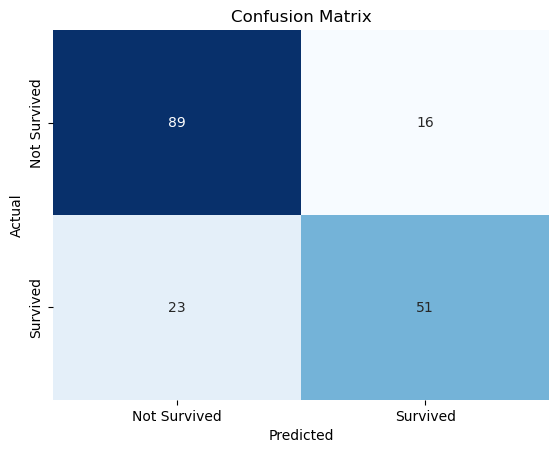

In [111]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()